# Análise de dados - Projeto Técnicas de Programação I

## Análise de dados de demanda de Energia Elétrica no Brasil

Os dados foram obtidos do ONS - Operador Nacional do Sistema Elétrico brasileiro.
Dataset baixado do Kaggle conforme link:
<https://www.kaggle.com/datasets/arusouza/23-years-of-hourly-eletric-energy-demand-brazil>


In [ ]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

É possível verificar que o dataset possui duas colunas:

**Index:** contendo a data e a hora no formato aaaa-mm-dd hh:mm:ss

**hourly_demand:** contendo a potência elétrica solicitada em MW

In [ ]:
# Leitura do arquivo csv
tabela = pd.read_csv('energy_demand_hourly_brazil.csv')
tabela.tail()

,index,hourly_demand
201313,2022-12-31 20:00:00,75825.344
201314,2022-12-31 21:00:00,69894.955
201315,2022-12-31 22:00:00,64612.355
201316,2022-12-31 23:00:00,61215.376
201317,2023-01-01 00:00:00,58900.643


## Verificação de valores ausentes

In [ ]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201318 entries, 0 to 201317
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          201318 non-null  object 
 1   hourly_demand  201318 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.1+ MB


Como não há valores ausentes, foi convertida a coluna 'index' para datetime a fim de criar duas colunas, 'year' e 'month' para facilitar a análise.

In [ ]:
tabela['index'] = pd.to_datetime(tabela['index'])

tabela['year'] = tabela['index'].dt.year
tabela['month'] = tabela['index'].dt.month

tabela

,index,hourly_demand,year,month
0,2000-01-01 00:00:00,34673.900,2000,1
1,2000-01-01 01:00:00,33503.000,2000,1
2,2000-01-01 02:00:00,32287.600,2000,1
3,2000-01-01 03:00:00,31059.400,2000,1
4,2000-01-01 04:00:00,30272.700,2000,1
...,...,...,...,...
201313,2022-12-31 20:00:00,75825.344,2022,12
201314,2022-12-31 21:00:00,69894.955,2022,12
201315,2022-12-31 22:00:00,64612.355,2022,12
201316,2022-12-31 23:00:00,61215.376,2022,12


## Verificação das demandas anuais de 2000 a 2022

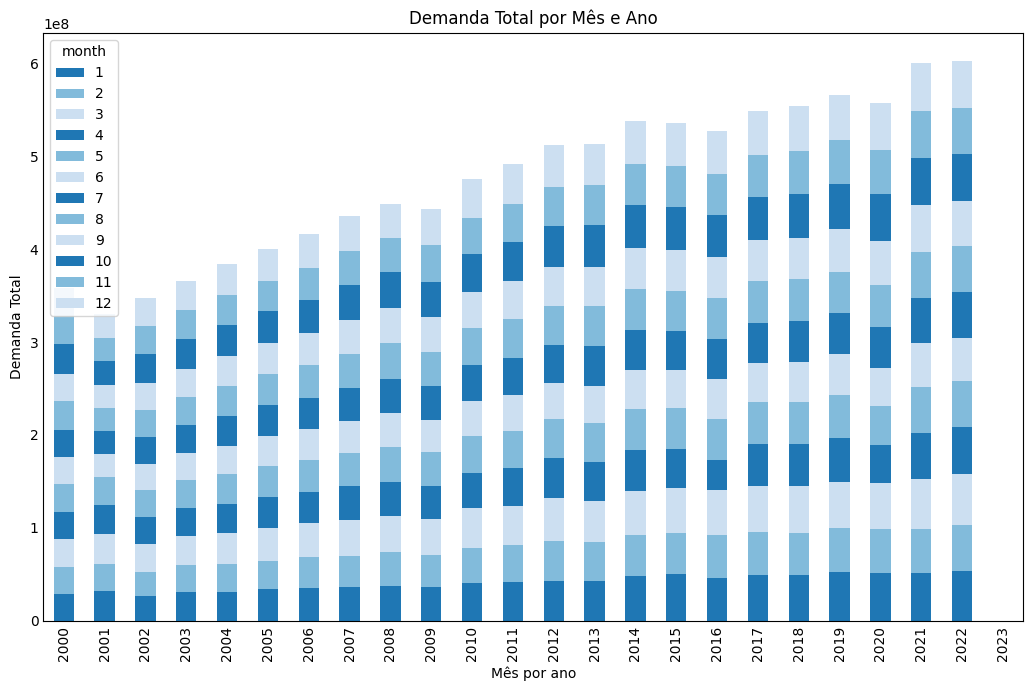

In [ ]:
demanda_total_mensal = tabela.groupby(['year', 'month'])['hourly_demand'].sum().unstack()

demanda_total_mensal.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicionar rótulos e título
plt.xlabel('Mês por ano')
plt.ylabel('Demanda Total')
plt.title('Demanda Total por Mês e Ano')

plt.show()

## Verificação da demanda média mensal nos meses de horário de verão: de outubro a fevereiro (1, 2, 10, 11, 12)



In [ ]:
demanda_media_mensal = tabela.groupby(['year', 'month'])['hourly_demand'].mean()
demanda_media_mensal.head(24)

year  month
2000  1        39253.390659
      2        40665.397845
      3        40556.063720
      4        40214.947917
      5        40408.382258
      6        40544.964444
      7        39964.849906
      8        41074.001075
      9        41075.071542
      10       42566.886420
      11       41862.386236
      12       41569.584341
2001  1        42464.376411
      2        43761.602128
      3        44272.108024
      4        42889.141694
      5        40287.073642
      6        34016.472833
      7        32944.634664
      8        33809.900094
      9        33896.124361
      10       34598.177670
      11       35277.156306
      12       34961.821747
Name: hourly_demand, dtype: float64

Criando o gráfico para a comparação da demanda média mensal, durante os anos em que houve o horário de verão (2000 a 2018), entre os meses com e sem horário de verão.

<ipython-input-62-79c3bf15134a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_horario_verao['mes_horario_verao'] = tabela_horario_verao['month'].isin(meses_horario_verao)


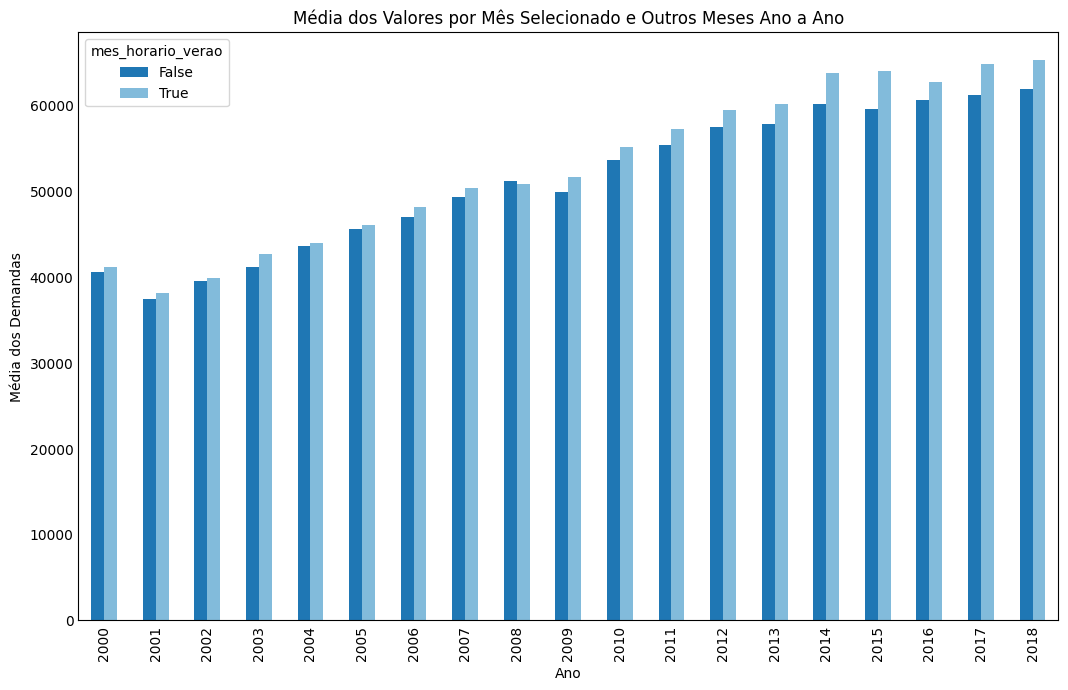

In [ ]:
tabela_horario_verao = tabela[(tabela['year'] >= 2000) & (tabela['year'] <= 2018)]

meses_horario_verao = [1, 2, 10, 11, 12]
tabela_horario_verao['mes_horario_verao'] = tabela_horario_verao['month'].isin(meses_horario_verao)

# Calcular as médias dos valores para os meses selecionados e os outros meses ano a ano
grouped = tabela_horario_verao.groupby(['year', 'mes_horario_verao'])['hourly_demand'].mean().unstack()



# Plotar o gráfico
grouped.plot(kind='bar', figsize=(10, 6))

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Média dos Demandas')
plt.title('Média dos Valores por Mês Selecionado e Outros Meses Ano a Ano')

# Mostrar o gráfico
plt.show()


Cálculo do desvio padrão dos anos de horário de verão para verificação dos erros.:

In [ ]:
grouped_error = tabela_horario_verao.groupby(['year', 'mes_horario_verao'])['hourly_demand'].std().unstack()
grouped_error

mes_horario_verao,False,True
year,,
2000,6145.269234,5698.385611
2001,6996.748545,6508.688080
2002,5575.762767,5751.374050
2003,5891.759279,5555.803919
2004,6286.887783,5942.492362
2005,6669.026469,6067.605093
2006,6842.431952,6469.688771
2007,7152.783423,6576.717077
2008,7207.520492,6950.537257


Criando o gráfico para a comparação da demanda média mensal, durante os anos em que não houve o horário de verão (2018 a 2022), entre os meses com e sem horário de verão.

<ipython-input-64-8f0275a5e055>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_sem_horario_verao['mes_horario_verao'] = tabela_sem_horario_verao['month'].isin(meses)


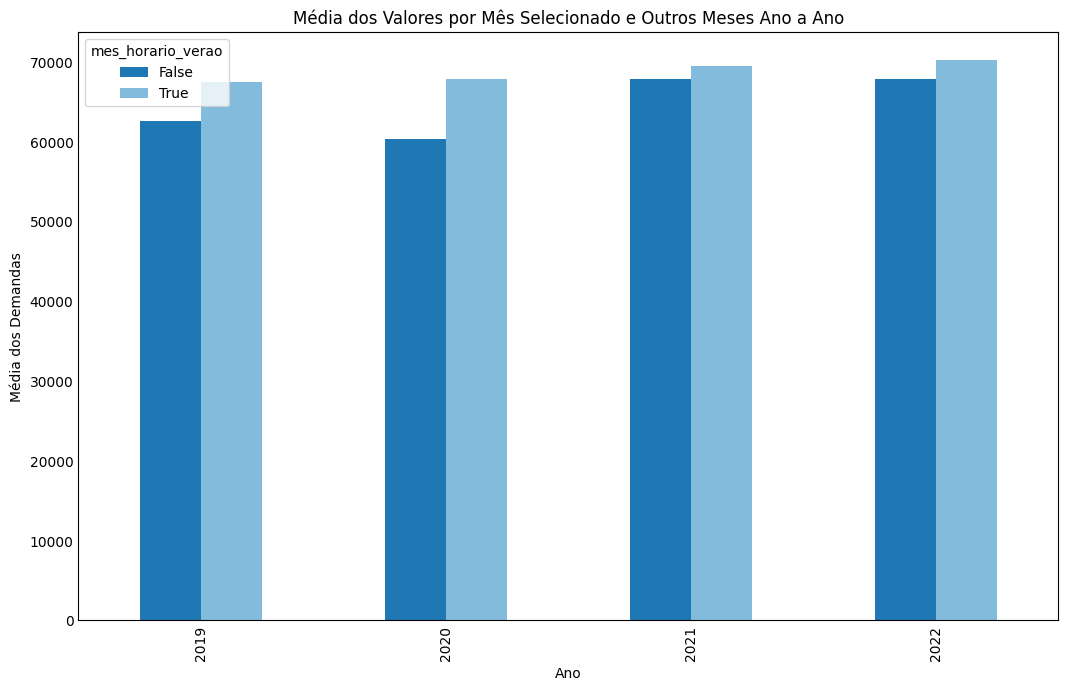

In [ ]:
tabela_sem_horario_verao = tabela[(tabela['year'] >= 2019) & (tabela['year'] <= 2022)]

meses = [1, 2, 10, 11, 12]
tabela_sem_horario_verao['mes_horario_verao'] = tabela_sem_horario_verao['month'].isin(meses)

# Calcular as médias dos valores para os meses selecionados e os outros meses ano a ano
grouped_2 = tabela_sem_horario_verao.groupby(['year', 'mes_horario_verao'])['hourly_demand'].mean().unstack()

# Plotar o gráfico
grouped_2.plot(kind='bar', figsize=(10, 6))

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Média dos Demandas')
plt.title('Média dos Valores por Mês Selecionado e Outros Meses Ano a Ano')

# Mostrar o gráfico
plt.show()

Cálculo do desvio padrão dos anos de horário de verão para verificação dos erros.:

In [ ]:
grouped_2_error = tabela_sem_horario_verao.groupby(['year', 'mes_horario_verao'])['hourly_demand'].std().unstack()
grouped_2_error

mes_horario_verao,False,True
year,,
2019,8540.068624,8486.812068
2020,8519.096022,8312.691271
2021,8030.098554,8113.132348
2022,8609.830219,8455.187016


Para comparar se há realmente a necessidade do horário de verão foi plotado o gráfico de dispersão no qual o eixo x representa as médias de demandas nos meses de horário de verão, e o eixo y representa as médias de demandas nos meses sem horário de verão.

Na cor laranja os anos em que houve o horário de verão e na cor azul os meses em que não houve horário de verão.

Foram acrescentadas as barras de erros, e uma reta x = y para verificar visualmente a possível linearidade dos pontos observados.

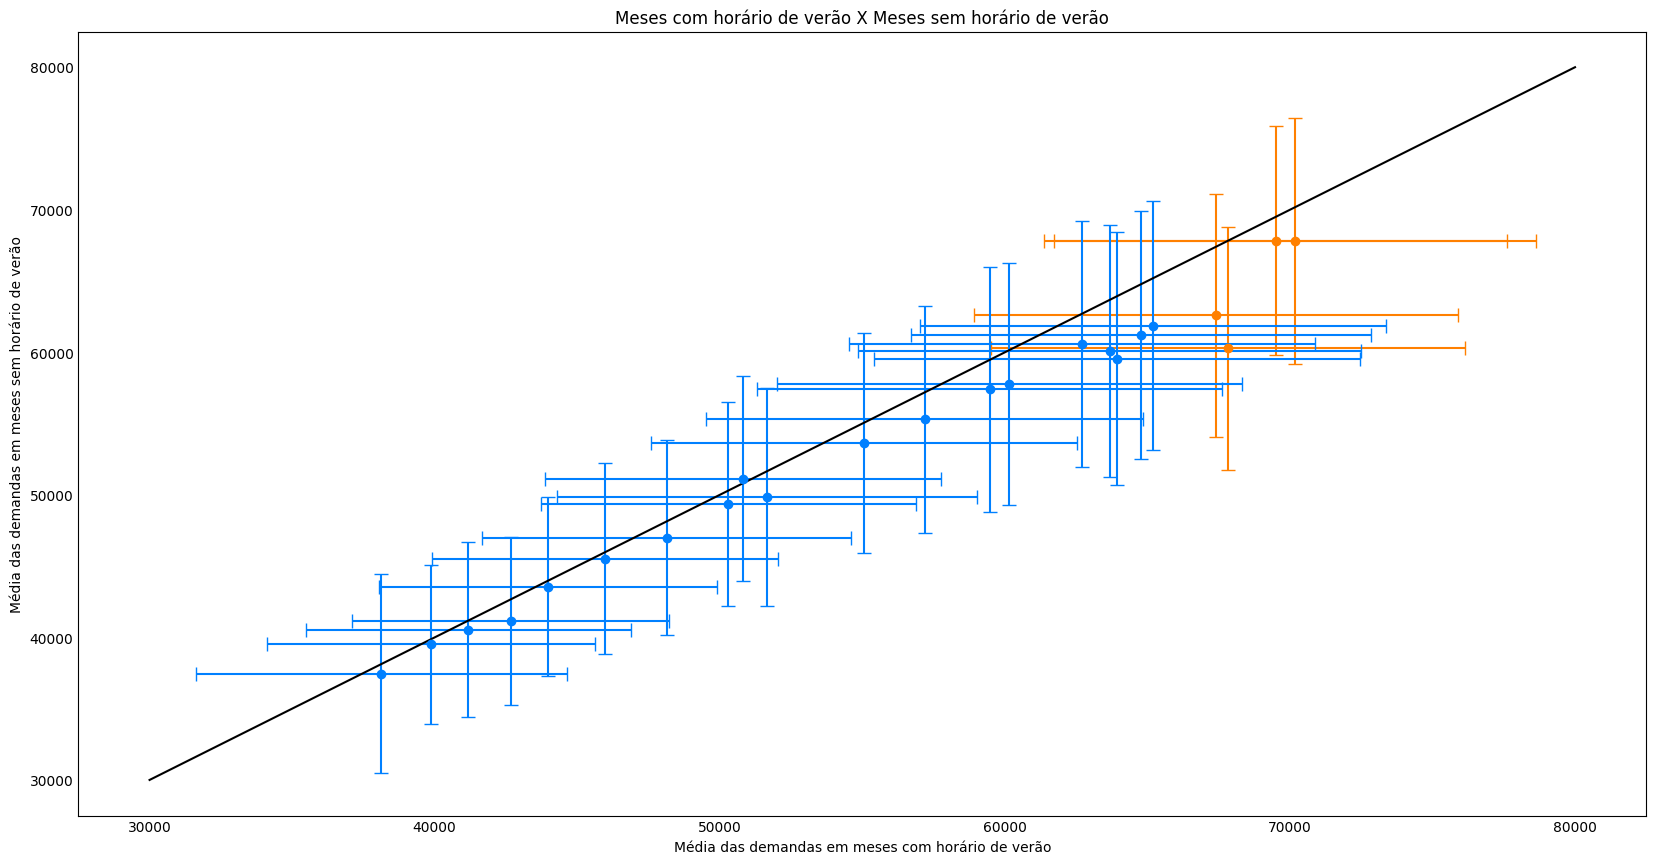

In [ ]:
# Ajustando a Figura
plt.figure(figsize = (16, 8))
x = [30000, 40000, 50000, 60000, 70000, 80000]
y = x

# Gráfico de Dispersão

plt.errorbar(grouped_2[True], grouped_2[False], xerr = grouped_2_error[True], yerr = grouped_2_error[False], fmt='o', capsize=5, label='Dados com erro', color = '#FF8000')
plt.errorbar(grouped[True], grouped[False], xerr = grouped_error[True], yerr = grouped_error[False], fmt='o', capsize=5, label='Dados com erro', color = '#0080FF')

plt.plot(x,y, color = 'black')

# Adicionar rótulos e título
plt.xlabel('Média das demandas em meses com horário de verão')
plt.ylabel('Média das demandas em meses sem horário de verão')
plt.title('Meses com horário de verão X Meses sem horário de verão')

plt.show()

# Conclusão

A reta x=y do gráfico nos mostra que em apenas um ponto a demanda dos meses de março a setembro foi maior do que a demanda dos meses de outubro a fevereiro, portanto podemos verificar que nos anos com e sem horário de verão, em sua grande maioria, há uma economia de energia no verão. As barras de erros nos mostram uma variação grande no valor de demanda horária presente no dataset. Essa imprecisão não nos permite afirmar que não houve uma mudança signitiva ao deixar de utilizar o horário de verão, sendo necessário mais dados dos próximos anos para ser mais conclusivo.
Entretanto como não há diferenças significativas dos valores de erros pode-se dizer que talvez não haja mudanças com e sem horário de verão.